## Wing and propulsion sizing using the matching plot technique.

\begin{align}
__Maxmimum velocity__
\frac{P}{W} = (\frac{1}{2} Cd_p \rho V_m^3 (\frac{S}{W}) + \frac{2}{\rho \pi AReV_m}(\frac{W}{S}))

__Stall velocity__
V_s = \sqrt{\frac{2}{Cl_m \rho} (\frac{W}{S})}

__Rate of climb__
\frac{P}{W} = ROC + \frac{1}{2} Cd_p \rho V_i^3 (\frac{S}{W}) + \frac{2}{\rho \pi AReV_i}(\frac{W}{S})
\end{align}

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Establish known constants and assumptions.

In [2]:
# Air density in kilograms per cubic meters.

In [3]:
rho = 1.225

In [4]:
# MH-114 airfoil drag coefficient.

In [5]:
cd_airfoil = 0.02

In [6]:
# Aircraft zero-lift drag.

In [7]:
cd_zero = 1.65*cd_airfoil

In [8]:
# Estimate the maximum speed in meters per second.

In [9]:
v_max = 27.432

In [10]:
# Establish Oswald's efficiency.

In [11]:
e = 0.83

In [12]:
# Expected aspect ratio.

In [13]:
ar = 8

In [14]:
# Set a range of anticipated wing loading values in Newtons per meters squared.

In [15]:
w_s = np.arange(25, 125, 1)

In [16]:
# Set of conservative coefficient of lift values.

In [17]:
cl = np.arange(0.9, 1.3, 0.1)

In [18]:
# A minimal ROC is 300 feet per minute, and the recommended overall ROC is 600 feet per minute. 

In [19]:
roc = np.linspace(3.048, 4.8768, 4)

In [20]:
# Set the minimal velocity in meters per second.

In [21]:
v = 3.048

In [22]:
# Set the stall velocity in meters per second.

In [23]:
v_stall = 10.668

### Perform the calculations.

In [24]:
# Calculating the maximum velocity.

In [25]:
w_p_v_max = ((1 / 2) * cd_zero * rho * ((v_max)**3) * (1 / w_s) + (2 * w_s) / (rho * np.pi * ar * e * v_max))**(-1)

In [26]:
# Calculating the rate of climb.

In [27]:
w_p_roc = (roc.reshape(1, roc.shape[0]) + (1 / 2) * cd_zero * rho * (v**3) * (1 / w_s.reshape(w_s.shape[0], 1)) + (2 * w_s.reshape(w_s.shape[0], 1)) / (rho * np.pi * ar * e * v))**(-1)

In [28]:
# Calculating the stall velocity.

In [29]:
w_s_stall = ((v_stall**2) * cl * rho) / 2

### Plot the results.

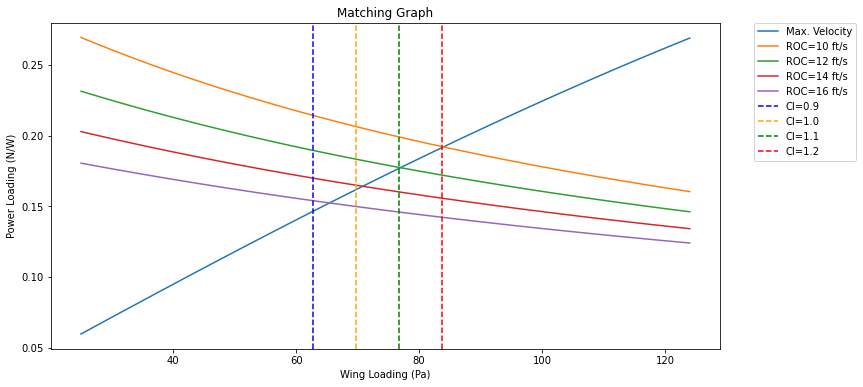

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(w_s, w_p_v_max)
plt.plot(w_s, w_p_roc)
plt.ylabel('Power Loading (N/W)')
plt.xlabel('Wing Loading (Pa)')
plt.axvline(w_s_stall[0], color='blue', linestyle='--')
plt.axvline(w_s_stall[1],  color='orange', linestyle='--')
plt.axvline(w_s_stall[2],  color='green', linestyle='--')
plt.axvline(w_s_stall[3], color='red', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels=['Max. Velocity', 
                                                                                 'ROC=10 ft/s', 
                                                                                 'ROC=12 ft/s', 
                                                                                 'ROC=14 ft/s', 
                                                                                 'ROC=16 ft/s', 
                                                                                 'Cl=0.9', 
                                                                                 'Cl=1.0', 
                                                                                 'Cl=1.1', 
                                                                                 'Cl=1.2'])
plt.title('Matching Graph')
plt.show()